In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
code_survey = pd.read_csv('data/2016-FCC-New-Coders-Survey-Data.csv', dtype='unicode')

In [3]:
print('code_survey:', code_survey.shape)

code_survey: (15620, 113)


**Let`s explore the data set:**

In [4]:
print(code_survey.head(n=5))

  Age AttendedBootcamp BootcampFinish BootcampFullJobAfter BootcampLoanYesNo  \
0  28                0            NaN                  NaN               NaN   
1  22                0            NaN                  NaN               NaN   
2  19                0            NaN                  NaN               NaN   
3  26                0            NaN                  NaN               NaN   
4  20                0            NaN                  NaN               NaN   

  BootcampMonthsAgo BootcampName BootcampPostSalary BootcampRecommend  \
0               NaN          NaN                NaN               NaN   
1               NaN          NaN                NaN               NaN   
2               NaN          NaN                NaN               NaN   
3               NaN          NaN                NaN               NaN   
4               NaN          NaN                NaN               NaN   

  ChildrenNumber      ...       ResourceSoloLearn ResourceStackOverflow  \
0    

**It seems like that most of the values can be encoded, using OneHotEncoder as they are categorical.**

In [5]:
code_survey.isnull().sum().sort_values()

Part1StartTime                      0
NetworkID                           0
Part1EndTime                        0
ID.x                                0
IsSoftwareDev                      83
AttendedBootcamp                  240
MonthsProgramming                 606
HoursLearning                     678
MoneyForLearning                  941
Part2StartTime                   1692
Part2EndTime                     1692
ID.y                             1692
Gender                           1874
SchoolDegree                     1941
CountryCitizen                   1966
IsEthnicMinority                 1975
HasFinancialDependents           1980
CityPopulation                   1990
HasHighSpdInternet               1995
Age                              2007
CountryLive                      2010
HasDebt                          2010
LanguageAtHome                   2038
HasServedInMilitary              2070
IsReceiveDiabilitiesBenefits     2090
EmploymentStatus                 2716
JobPref     

**Looks like there are plenty of NA values in the data set. Let`s explore further:**

In [22]:
code_survey.Age.describe()

count    15620.000000
mean        29.175421
std          8.418427
min         10.000000
25%         24.000000
50%         29.000000
75%         32.000000
max         86.000000
Name: Age, dtype: float64

**The youngest one is 10 years old and the oldest one 86, also the mean age is 29**

**Let`s bin the ages according to age groups:**

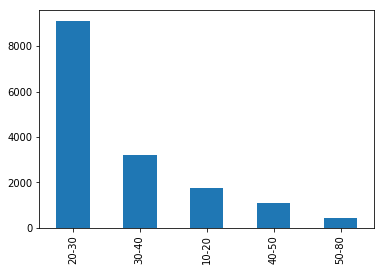

In [27]:
code_survey["Age"] = code_survey["Age"].apply(pd.to_numeric)
# Fill NA values with the mean:
code_survey["Age"] = code_survey["Age"].fillna(code_survey["Age"].mean())
age = pd.DataFrame(code_survey["Age"])
age_groups = [10, 20, 30, 40, 50, 80]
group_names = ['10-20', '20-30', '30-40', '40-50', '50-80']
categories = pd.cut(df["Age"], age_groups, labels=group_names)
categories.value_counts().plot(kind="bar");